<a href="https://colab.research.google.com/github/appyjais/Text-Classification-and-summary/blob/main/Text_Classification_and_top_phrase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
path = '/content/drive/MyDrive/Assignment/securly/dataset/dataset/train.csv/train.csv'
df = pd.read_csv(path)

In [154]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [155]:
df['len'] = df['comment_text'].str.len()

In [ ]:
pd.set_option('display.max_colwidth', -1)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [ ]:
sum(df.duplicated())

0

# EDA

In [ ]:
df[df['toxic']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
12    Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...  

In [ ]:
df[df['severe_toxic']==1]['comment_text'].head()

6      COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                             
55     Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!
181    you are a stupid fuck \n\nand your mother's cunt stinks                                  
442    Hi \n\nIm a fucking bitch.\n\n50.180.208.181                                             
579    What a motherfucking piece of crap those fuckheads for blocking us!                      
Name: comment_text, dtype: object

In [ ]:
df[df['obscene']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [ ]:
df[df['threat']==1]['comment_text'].head()

79      Hi! I am back again!\nLast warning!\nStop undoing my edits or die!                                                                                    
176     I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms                      
600     I'm also a sock puppet of this account...SUPRISE!!\n-sincerely,\n            The man that will track you down from the Internet and kill you          
802     Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.                                                                 
1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.
Name: comment_text, dtype: object

In [ ]:
df[df['insult']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [ ]:
df[df['identity_hate']==1]['comment_text'].head()

42     You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!
105    A pair of jew-hating weiner nazi schmucks.                                                                                                                                                                                                                                                                                         

In [ ]:
print(df.shape)
n = df.shape[0]

(159571, 9)


In [ ]:
tags = ['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']


class toxic appear max no. of times with 9% of data
class severe toxic min no. of times with .9% of data


In [ ]:
df['Total_Tags'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67,0


In [ ]:
print('safe comments: ',df[df['Total_Tags'] == 0].shape[0]/n*100, '%')

safe comments:  89.83211235124176 %


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221,0.219952
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,6.000000


In [ ]:
(df.isna().sum()/n*100).reset_index()

,index,0
0,id,0.0
1,comment_text,0.0
2,toxic,0.0
3,severe_toxic,0.0
4,obscene,0.0
5,threat,0.0
6,insult,0.0
7,identity_hate,0.0
8,len,0.0
9,Total_Tags,0.0


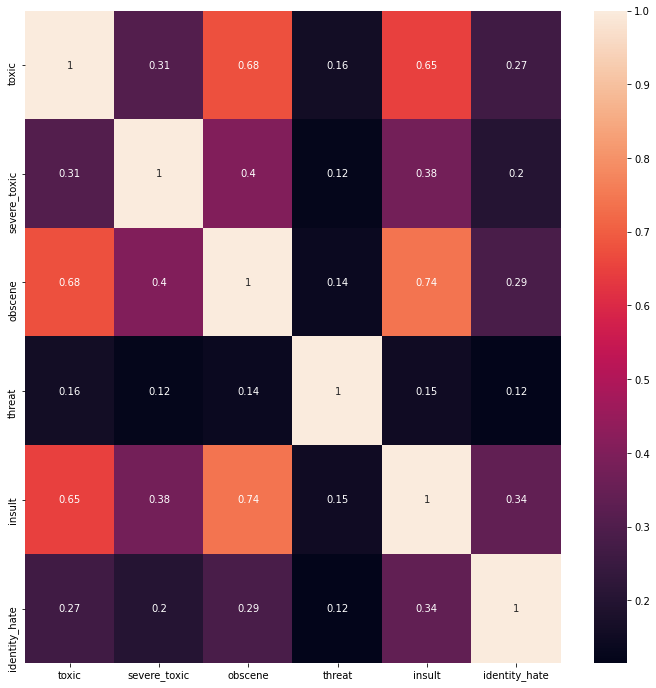

In [ ]:
correlation = df[tags].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot= True)

In [ ]:
from wordcloud import WordCloud ,STOPWORDS

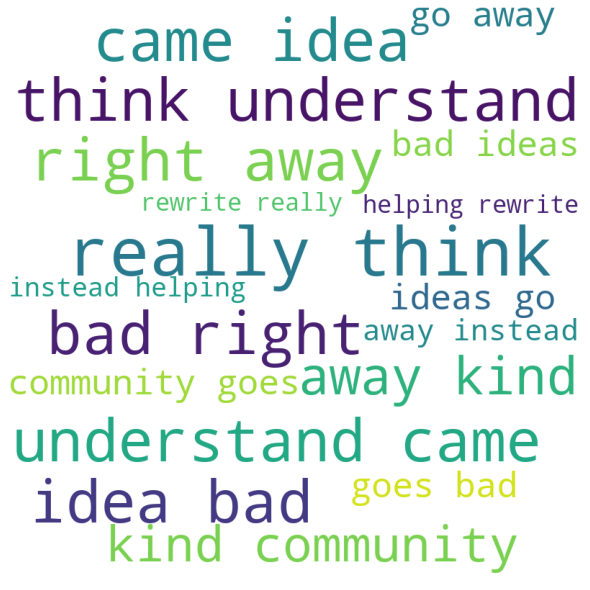

In [ ]:
stopwords = set(STOPWORDS) 
for comment in df.comment_text:
  comment_words = ''
  com = str(comment)
  tokens = com.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def visualize_word(df):
  stopwords = set(STOPWORDS) 
  for comment in df.comment_text:
    comment_words = ''
    com = str(comment)
    tokens = com.split() 
        
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 

Seeing the freq non toxic comment word

In [ ]:
#visualize_word(df[df['Total_Tags']==0])

Seeing the freq toxic comments

In [ ]:
#visualize_word(df[df['toxic']==1])

Seeing the freq toxic comments

In [ ]:
#visualize_word(df[df['toxic']==1])

Seeing the freq severe_toxic comments

In [ ]:
#visualize_word(df[df['severe_toxic']==1])

Seeing the freq obscene comments

In [ ]:
#visualize_word(df[df['obscene']==1])

Seeing the freq threat comments

In [ ]:
#visualize_word(df[df['threat']==1])

Seeing the freq insult comments

In [ ]:
#visualize_word(df[df['insult']==1])

Seeing the freq identity_hate comments

In [ ]:
#visualize_word(df[df['identity_hate']==1])

# TFIDF

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') and len(word)<100]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
print(corpus[0])

explan edit made usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc retir


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:

tfidf_v=TfidfVectorizer(max_features=2500,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
y = df[tags]
len(tfidf_v.get_feature_names())

2500

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

(127656, 2500)
(127656,)
accuracy:   0.947
f1 score:   0.650
Confusion matrix, without normalization


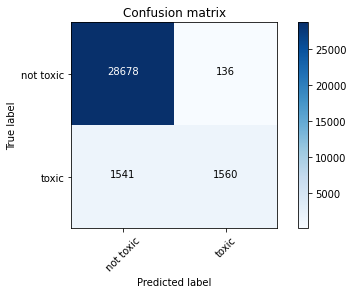

In [ ]:

count_df_train = pd.DataFrame(X_train, columns=list(tfidf_v.get_feature_names()))
count_df_test = pd.DataFrame(X_test, columns=list(tfidf_v.get_feature_names()))
classifier=MultinomialNB()
tag = 'toxic'
print(count_df_train.shape)
print(y_train[tag].shape)
classifier.fit(count_df_train, y_train[tag])
pred = classifier.predict(count_df_test)
score = metrics.accuracy_score(y_test[tag], pred)

print("accuracy:   %0.3f" % score)
print("f1 score:   %0.3f" % f1_score(y_test[tag], pred))


cm = metrics.confusion_matrix(y_test[tag], pred)
plot_confusion_matrix(cm, classes=['not toxic', 'toxic'])

5000 dictionary



```
# This is formatted as code
```

# LSTM


In [156]:
from nltk import word_tokenize
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
df['tokenized_sents'] = df.apply(lambda row: word_tokenize(row['comment_text']), axis=1)
#df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [158]:
def preprocess(df):
  df['preprocess'] = df.apply(lambda row: row['comment_text'].replace("\n"," "), axis=1) #removes new line character
  df['preprocess'] = df.apply(lambda row: re.sub('[^A-Za-z\' ]+', '',row['preprocess']).lower(), axis=1)
  df['preprocess'] = df['preprocess'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  df['preprocess'] = df.apply(lambda row: re.sub('  +', ' ',row['preprocess']).strip(), axis=1)
  df['tokenized_sents'] = df.apply(lambda row: word_tokenize(row['preprocess']), axis=1)
  

In [159]:
preprocess(df)


In [160]:
df["preprocess1"] = df.apply(lambda x: x["comment_text"] if len(x["preprocess"])==0 else x['preprocess'], axis=1)

In [161]:
traindf=df[['preprocess1','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]


In [170]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM, Embedding, Input
from keras import metrics
import keras

In [163]:
traind=traindf["preprocess1"]
train_label=traindf[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(traind)
train_final = tokenizer.texts_to_sequences(traind)
traind=pad_sequences(train_final, maxlen=200)

In [164]:
print(traind.shape,train_label.shape)

(159571, 200) (159571, 6)


In [65]:
max_features = 20000
embedding_dims = 32

In [166]:
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(LSTM(units = embedding_dims, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(units = embedding_dims, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, None, 32)          640000    
_________________________________________________________________
lstm_33 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_34 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 198       
Total params: 656,838
Trainable params: 656,838
Non-trainable params: 0
_________________________________________________________________


In [109]:
from sklearn.model_selection import train_test_split
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = [metrics.AUC(),metrics.Recall(), metrics.Accuracy(), metrics.Precision()])
x_train, x_val, y_train, y_val = train_test_split(traind, train_label, shuffle = True, random_state = 123)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
model.fit(x_train, y_train, batch_size = 512, epochs = 10, validation_data = (x_val, y_val))

(119678, 200) (119678, 6) (39893, 200) (39893, 6)
Epoch 1/10
234/234 [==============================] - 375s 2s/step - loss: 0.1285 - auc_1: 0.8176 - recall_1: 0.0506 - accuracy: 0.0000e+00 - precision: 0.4629 - val_loss: 0.0626 - val_auc_1: 0.9673 - val_recall_1: 0.5399 - val_accuracy: 0.0000e+00 - val_precision: 0.8194
Epoch 2/10
234/234 [==============================] - 369s 2s/step - loss: 0.0595 - auc_1: 0.9732 - recall_1: 0.6110 - accuracy: 0.0000e+00 - precision: 0.7983 - val_loss: 0.0538 - val_auc_1: 0.9749 - val_recall_1: 0.6550 - val_accuracy: 0.0000e+00 - val_precision: 0.7915
Epoch 3/10
234/234 [==============================] - 369s 2s/step - loss: 0.0499 - auc_1: 0.9810 - recall_1: 0.6747 - accuracy: 0.0000e+00 - precision: 0.8159 - val_loss: 0.0515 - val_auc_1: 0.9750 - val_recall_1: 0.6525 - val_accuracy: 0.0000e+00 - val_precision: 0.8005
Epoch 4/10
234/234 [==============================] - 367s 2s/step - loss: 0.0445 - auc_1: 0.9844 - recall_1: 0.7007 - accuracy: 0.

In [110]:
model.save('Text_Classification')

INFO:tensorflow:Assets written to: Text_Classification/assets


In [172]:
model = keras.models.load_model('Text_Classification')

In [180]:
pred = model.predict(x_val)
from sklearn import metrics
tags = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

In [181]:
pred_df = pd.DataFrame(pred, columns = tags)

In [182]:
pred_df['toxic'].head()

0    0.000897
1    0.001540
2    0.003000
3    0.000426
4    0.001736
Name: toxic, dtype: float32

In [183]:
y_val['toxic'].head()

50446    0
81571    0
25983    0
39022    0
49431    0
Name: toxic, dtype: int64

In [199]:
N = 100
threshold = [n / N for n in range(1,N)]
threshold_max = dict(zip(tags,[0]*6))
threshold_argmax = dict(zip(tags,[0]*6))
for i in tags:
  for t in threshold:
    pred_df['tmp'] = (pred_df[i]>= t).astype(int)
    score = metrics.f1_score(y_val[i], pred_df['tmp'])
    if score==0:
      break
    if(score > threshold_max[i]):
      threshold_max[i] = score
      threshold_argmax[i] = t

    print("%s : f1 score for threshold %0.2f :   %0.3f" %(i, t, score ))
pred_df.drop(columns  = 'tmp')

toxic : f1 score for threshold 0.01 :   0.605
toxic : f1 score for threshold 0.02 :   0.651
toxic : f1 score for threshold 0.03 :   0.672
toxic : f1 score for threshold 0.04 :   0.686
toxic : f1 score for threshold 0.05 :   0.696
toxic : f1 score for threshold 0.06 :   0.704
toxic : f1 score for threshold 0.07 :   0.716
toxic : f1 score for threshold 0.08 :   0.718
toxic : f1 score for threshold 0.09 :   0.722
toxic : f1 score for threshold 0.10 :   0.725
toxic : f1 score for threshold 0.11 :   0.728
toxic : f1 score for threshold 0.12 :   0.730
toxic : f1 score for threshold 0.13 :   0.732
toxic : f1 score for threshold 0.14 :   0.734
toxic : f1 score for threshold 0.15 :   0.738
toxic : f1 score for threshold 0.16 :   0.740
toxic : f1 score for threshold 0.17 :   0.739
toxic : f1 score for threshold 0.18 :   0.741
toxic : f1 score for threshold 0.19 :   0.743
toxic : f1 score for threshold 0.20 :   0.745
toxic : f1 score for threshold 0.21 :   0.746
toxic : f1 score for threshold 0.2

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.000897,0.000010,0.000265,0.000058,0.000232,0.000109
1,0.001540,0.000017,0.000410,0.000093,0.000386,0.000176
2,0.003000,0.000019,0.000587,0.000110,0.000582,0.000216
3,0.000426,0.000004,0.000133,0.000032,0.000118,0.000060
4,0.001736,0.000017,0.000454,0.000096,0.000419,0.000184
...,...,...,...,...,...,...
39888,0.000435,0.000004,0.000136,0.000030,0.000116,0.000056
39889,0.000439,0.000004,0.000137,0.000032,0.000120,0.000061
39890,0.000657,0.000006,0.000189,0.000036,0.000162,0.000070
39891,0.000664,0.000006,0.000187,0.000033,0.000157,0.000068


In [200]:
#print(threshold_argmax)
#print(threshold_max)

In [201]:
for i in tags:
  pred_df[i] = (pred_df[i]>= threshold_argmax[i]).astype(int)

In [202]:
score = metrics.f1_score(y_val[i], pred_df[i], average = 'micro')
print(score)

0.9811245080590579


In [203]:
pred_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,tmp
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
